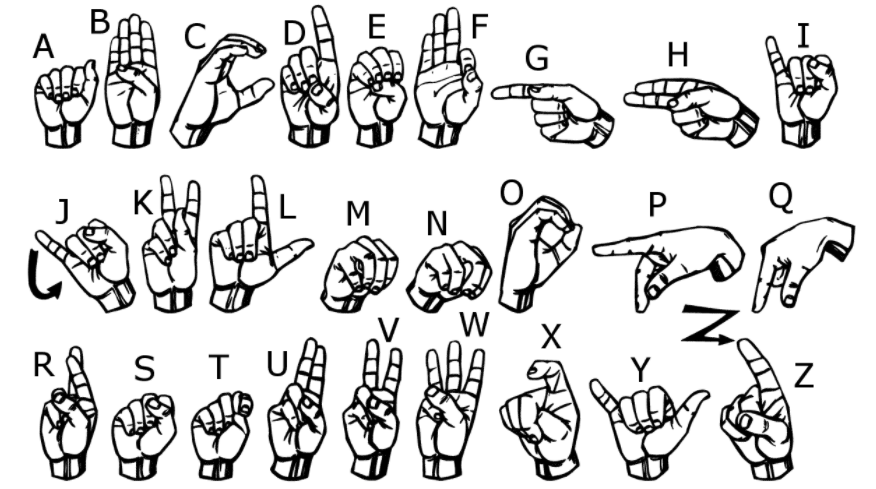

In [2]:
from IPython.display import Image
Image(filename="images/american_sign_language.PNG", width= 800, height=500)

### The steps demonstrated are:

1. Loading the data
2. Familiarizing with data
3. Converting the pandas Dataframe into Numpy Arrays
4. Visualizing the data
5. Data Preprocessing & EDA
6. Training the data
7. Model Performance Comparision
8. Conclusion

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn import metrics 
from sklearn.decomposition import PCA

## 1. Loading Data

The Dataset is downloaded from https://www.kaggle.com/datamunge/sign-language-mnist . 

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z. The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label,

pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

In [4]:
train_dataframe = pd.read_csv("input/sign_mnist_train.csv")

In [5]:
test_dataframe = pd.read_csv("input/sign_mnist_test.csv")

## 2. Familiarizing with Data

In [6]:
train_dataframe.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
train_dataframe.shape

(27455, 785)

In [8]:
train_dataframe.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [9]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [10]:
train_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


In [11]:
test_dataframe.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [12]:
test_dataframe.shape

(7172, 785)

In [13]:
test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [14]:
test_dataframe.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [15]:
test_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
label,7172.0,11.247351,7.446712,0.0,4.00,11.0,18.0,24.0
pixel1,7172.0,147.532627,43.593144,0.0,122.00,154.0,178.0,255.0
pixel2,7172.0,150.445761,41.867838,0.0,126.00,157.0,179.0,255.0
pixel3,7172.0,153.324317,40.442728,0.0,130.00,159.0,181.0,255.0
pixel4,7172.0,155.663413,39.354776,0.0,134.00,161.0,182.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,7172.0,159.648494,65.499368,0.0,113.75,182.0,208.0,255.0
pixel781,7172.0,158.162019,66.493576,0.0,113.00,181.0,207.0,255.0
pixel782,7172.0,157.672755,66.009690,0.0,115.00,180.0,205.0,255.0
pixel783,7172.0,156.664250,67.202939,0.0,111.00,180.0,206.0,255.0


## 3. Converting the pandas Dataframe into Numpy Arrays

In [16]:
inputs_array_train = train_dataframe.iloc[:, 1:].to_numpy()
targets_array_train = train_dataframe['label'].to_numpy()
inputs_array_test = test_dataframe.iloc[:, 1:].to_numpy()
targets_array_test = test_dataframe['label'].to_numpy()

## 4. Visualizing the data

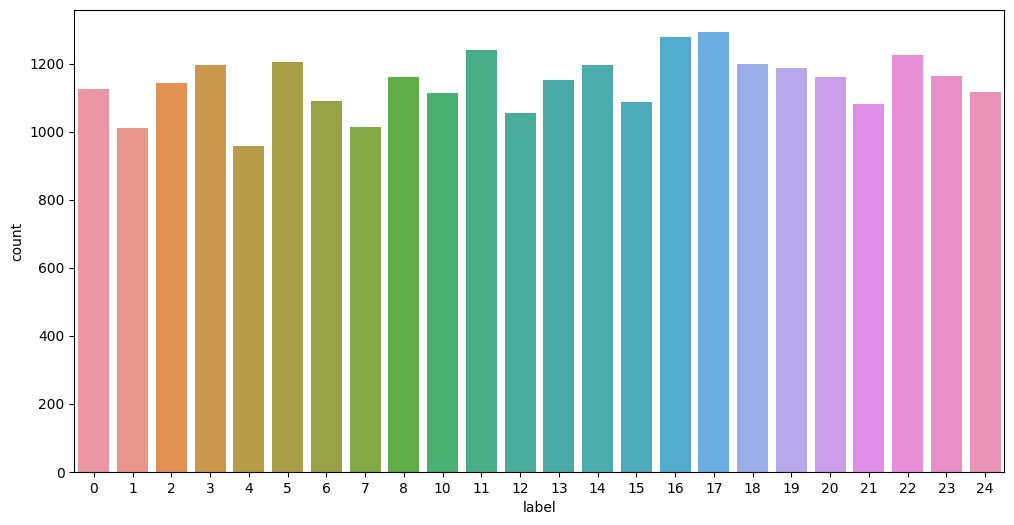

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x="label",data=train_dataframe);

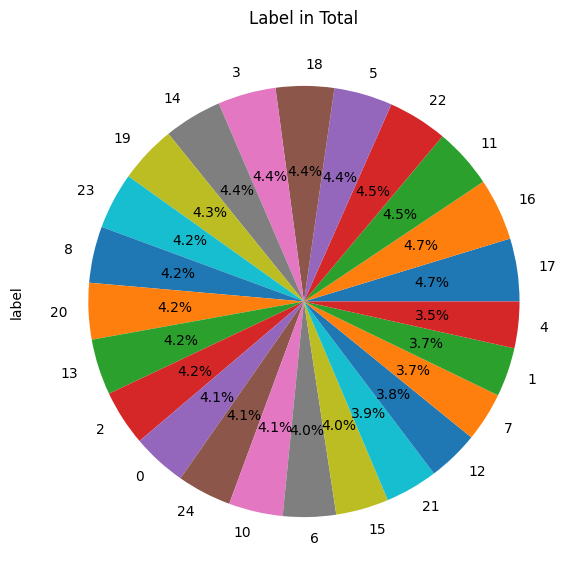

In [18]:
train_dataframe['label'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))
plt.title("Label in Total")
plt.show()

In [19]:

def Show_Train_Image(row):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
    fig.figsize=(1,1)
    img =np.reshape(inputs_array_train[row], (28, 28))
    print("Actual Label : ",chr(ord('A')+targets_array_train[row]))
    ax1.set_title("Original Image")
    ax1.axis("off")
    ax1.imshow(img);
    ax2.axis("off")
    ax2.set_title("Gray Image")
    ax2.imshow(img,cmap='gray');



def Show_Test_Image(row,y_test):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
    fig.figsize=(1,1)
    img =np.reshape(inputs_array_train[row], (28, 28))
    print("Actual Label : ",chr(ord('A')+targets_array_train[row]))
    print("Predicted Label : ",chr(ord('A')+y_test[row]))
    ax1.set_title("Original Image")
    ax1.axis("off")
    ax1.imshow(img);
    ax2.axis("off")
    ax2.set_title("Gray Image")
    ax2.imshow(img,cmap='gray');

Actual Label :  H


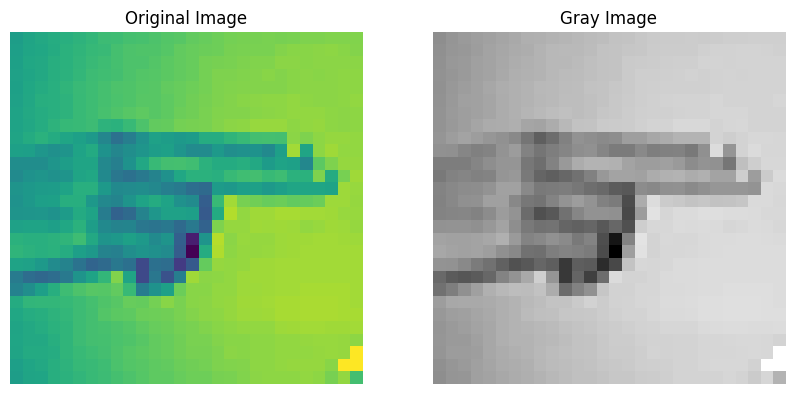

In [20]:
Show_Train_Image(345)

Actual Label :  D


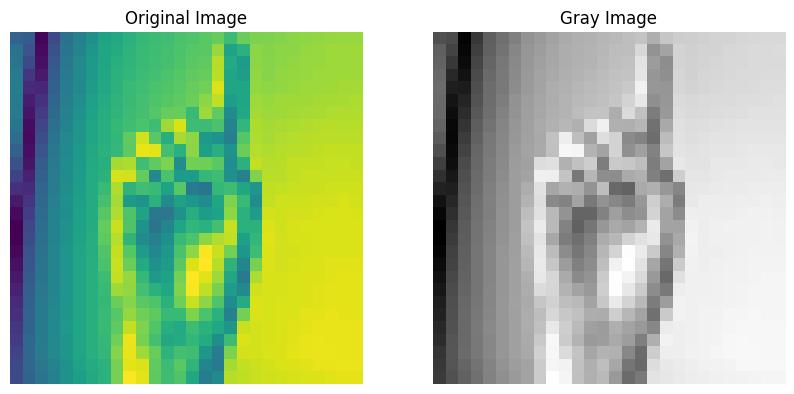

In [21]:
Show_Train_Image(3256)

## 5. Data Preprocessing & EDA

In [22]:
X_train=inputs_array_train/255
X_test=inputs_array_test/255

y_train = targets_array_train  
y_test  = targets_array_test

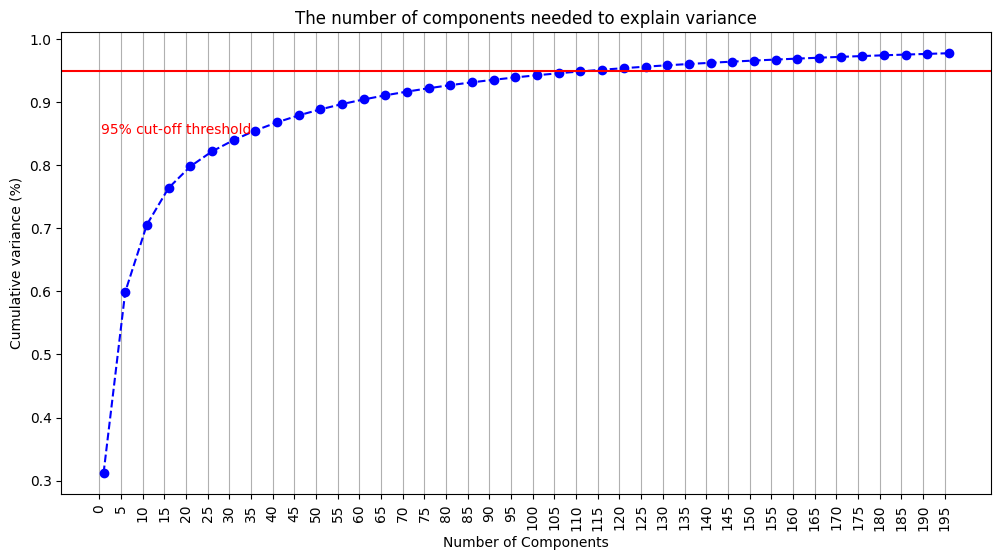

The number of components needed to explain variance :  113


In [23]:
pca = PCA().fit(X_train)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
x = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x[:200:5], y[:200:5], marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 200, step=5),rotation=90)
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red')

ax.grid(axis='x')
plt.show()

for i,j in zip(x,y):
    if(j>0.95):
        print('The number of components needed to explain variance : ',i)
        break

## 6. Model Building & Training:
   
 The machine learning models considered to train the dataset are:

1. Logistic Regression
2. Decision Tree
3. Support Vector Machine
4. Random Forest
5. Naive Bayes Classifier
6. k-Nearest Neighbors

              
The metrics considered to evaluate the model performance are Accuracy, Classification_report & Confusion Matrix.

In [24]:
ML_Model = []
acc_train = []
acc_test = []


def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## 6.1. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log = Pipeline([('reduce_dims', PCA(n_components=113)),
                ('model', LogisticRegression(multi_class="multinomial" ,random_state = 0))])

# fit the model 
log.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model',
                 LogisticRegression(multi_class='multinomial',
                                    random_state=0))])

In [26]:
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

#### Performance Evaluation:

In [27]:
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_log))

Logistic Regression : Accuracy on training Data: 0.999
Logistic Regression: Accuracy on test Data: 0.674


In [28]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       331
           1       1.00      0.82      0.90       432
           2       0.89      0.93      0.91       310
           3       0.83      0.71      0.77       245
           4       0.89      0.89      0.89       498
           5       0.57      0.91      0.70       247
           6       0.85      0.71      0.78       348
           7       0.86      0.66      0.75       436
           8       0.76      0.74      0.75       288
          10       0.50      0.31      0.38       331
          11       0.56      0.90      0.69       209
          12       0.68      0.63      0.65       394
          13       0.65      0.52      0.58       291
          14       0.98      0.66      0.79       246
          15       0.86      0.93      0.89       347
          16       0.58      0.74      0.65       164
          17       0.19      0.44      0.27       144
          18       0.34    

<Figure size 1000x1000 with 0 Axes>

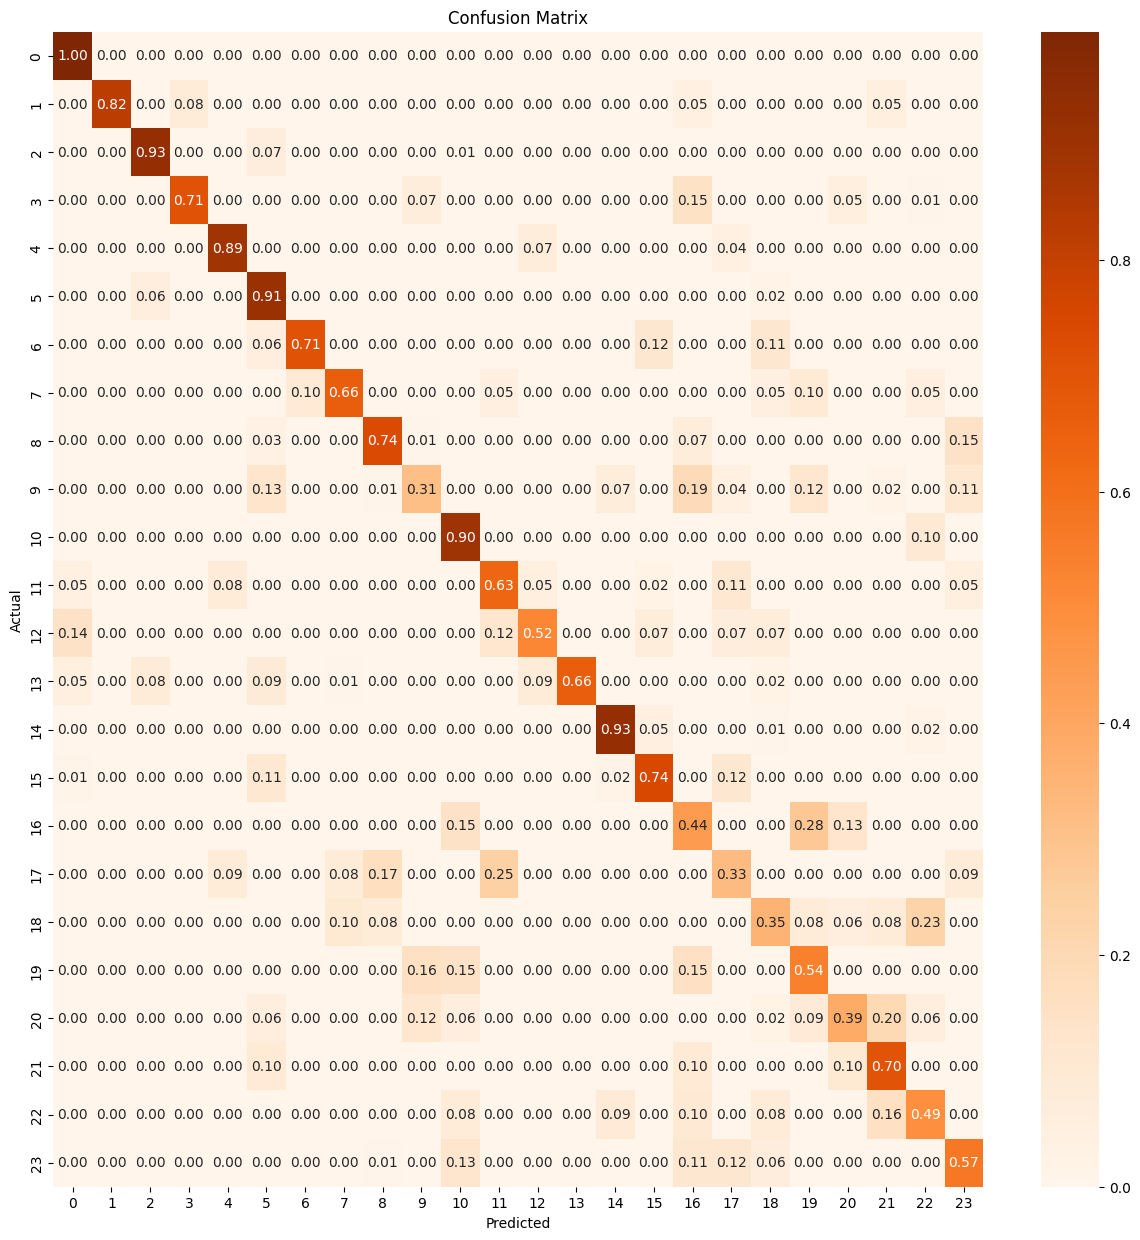

In [29]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_log)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

#### Storing Results:

In [30]:
storeResults('Logistic Regression',acc_train_log, acc_test_log)

#### Storing Model:

In [31]:
import joblib
joblib.dump(log,'model/logistic_model')

['model/logistic_model']

Actual Label :  N
Predicted Label :  F


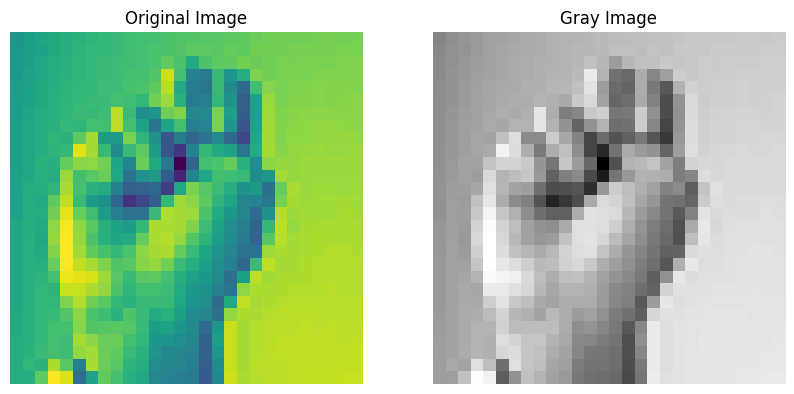

In [32]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(3252,y_test_log)

Actual Label :  C
Predicted Label :  P


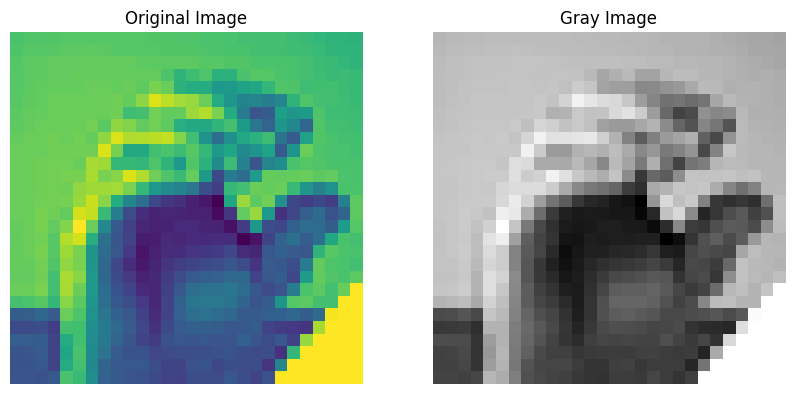

In [33]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(246,y_test_log)

## 6.2. Decision Trees : Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

tree = Pipeline([('reduce_dims', PCA(n_components=113)),
                 ('model', DecisionTreeClassifier(max_depth=30))])

tree.fit(X_train, y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', DecisionTreeClassifier(max_depth=30))])

In [35]:
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

#### Performance Evaluation:

In [36]:
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)


print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on training Data: 0.994
Decision Tree : Accuracy on test Data: 0.412


In [37]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.59      0.77      0.67       331
           1       0.59      0.62      0.61       432
           2       0.62      0.53      0.57       310
           3       0.28      0.27      0.27       245
           4       0.58      0.45      0.51       498
           5       0.45      0.62      0.52       247
           6       0.58      0.60      0.59       348
           7       0.65      0.58      0.61       436
           8       0.23      0.32      0.27       288
          10       0.31      0.24      0.27       331
          11       0.42      0.45      0.44       209
          12       0.59      0.35      0.44       394
          13       0.12      0.13      0.12       291
          14       0.46      0.41      0.44       246
          15       0.65      0.59      0.62       347
          16       0.33      0.35      0.34       164
          17       0.15      0.33      0.21       144
          18       0.20    

<Figure size 1000x1000 with 0 Axes>

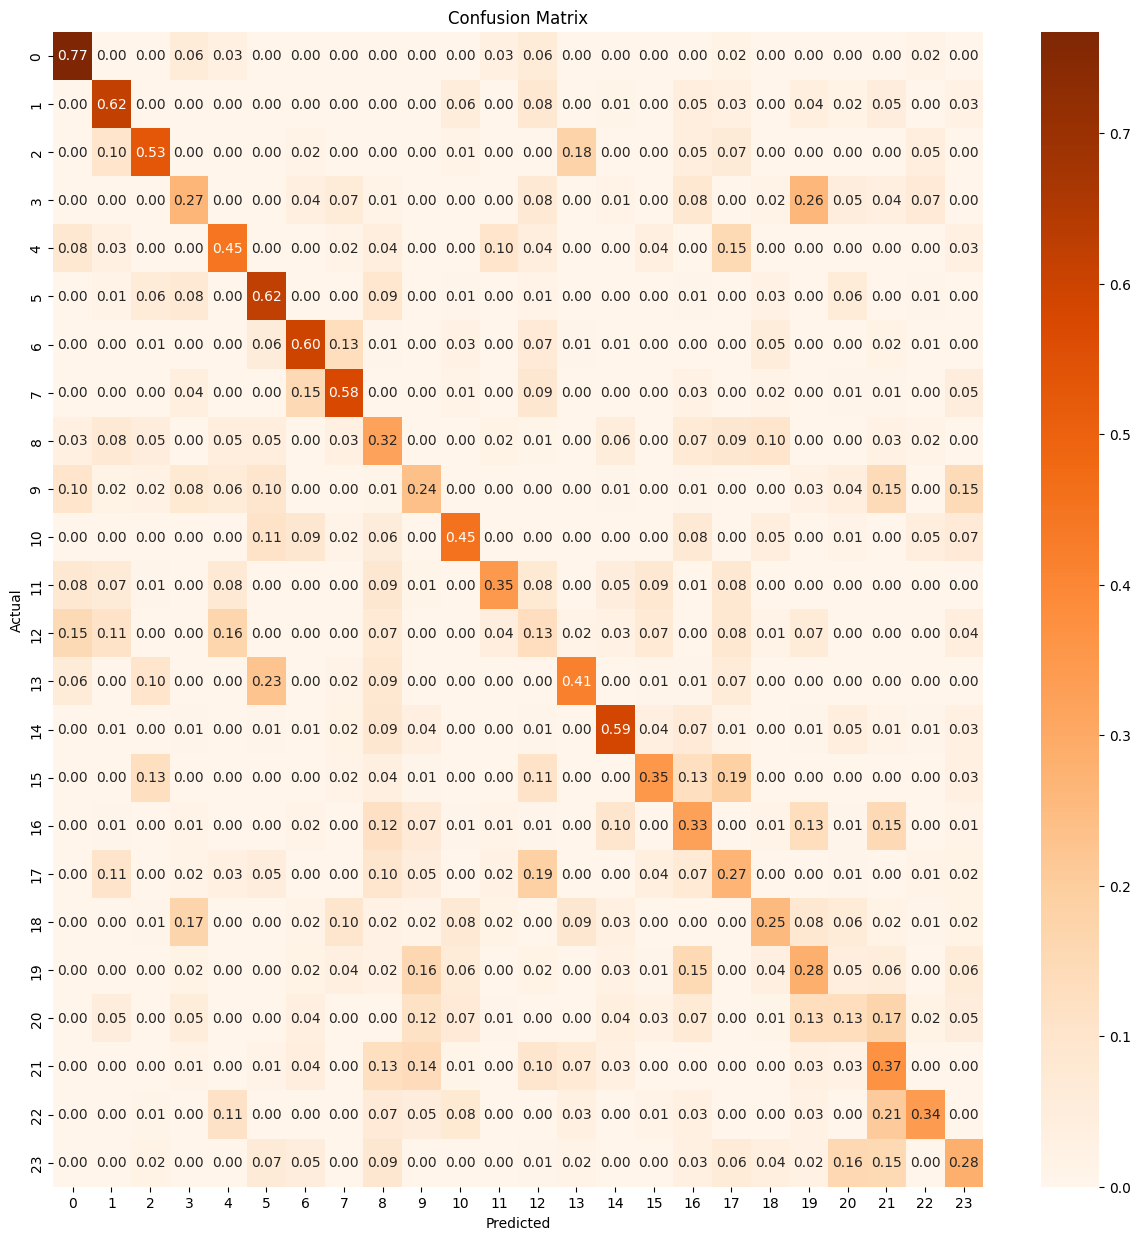

In [38]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_tree)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

In [ ]:
training_accuracy = []
test_accuracy = []

depth = range(1,31)
for n in depth:
    tree_test = Pipeline([('reduce_dims', PCA(n_components=113)),
                    ('model', DecisionTreeClassifier(max_depth=n))])

    tree_test.fit(X_train, y_train)
  
    training_accuracy.append(tree_test.score(X_train, y_train))
   
    test_accuracy.append(tree_test.score(X_test, y_test))
    

plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

#### Storing Results:

In [ ]:
storeResults('Decision Tree',acc_train_tree, acc_test_tree)

#### Storing Model:

In [41]:
import joblib
joblib.dump(tree,'model/tree_model')

['model/tree_model']

Actual Label :  C
Predicted Label :  P


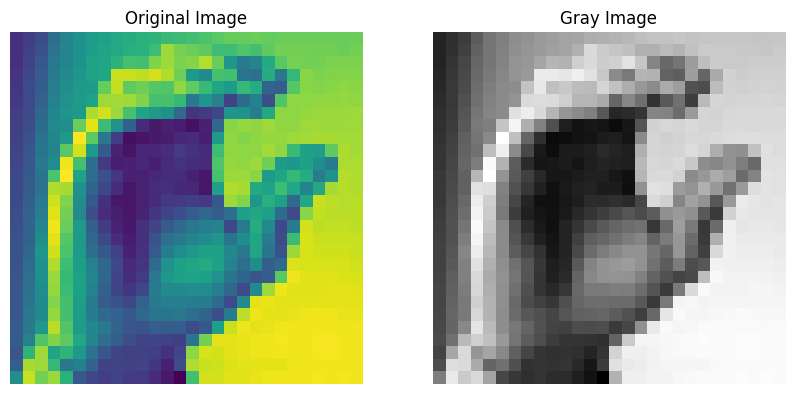

In [42]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(3253,y_test_tree)

Actual Label :  R
Predicted Label :  B


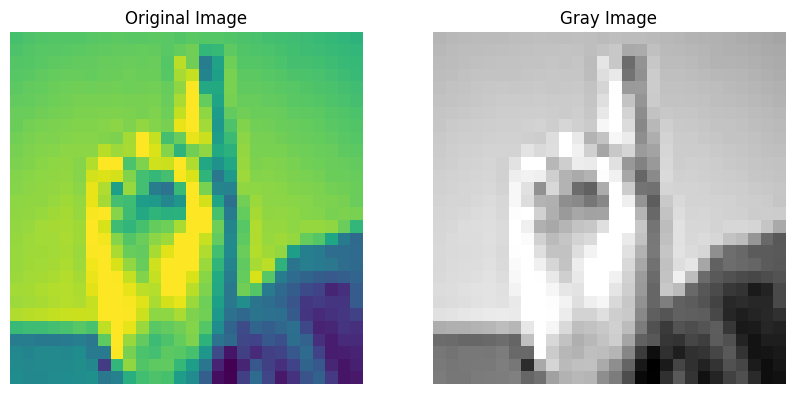

In [43]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(2356,y_test_tree)

## 6.3. Support Vector Machine : Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svc= Pipeline([('reduce_dims', PCA(n_components=113)),('model', SVC())])

svc.fit(X_train,y_train)

In [45]:
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

#### Performance Evaluation:

In [46]:
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)

print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))

Support Vector Machine : Accuracy on training Data: 1.000
Support Vector Machine : Accuracy on test Data: 0.851


In [47]:
print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      1.00      1.00       432
           2       0.87      0.99      0.93       310
           3       0.94      1.00      0.97       245
           4       0.94      0.99      0.96       498
           5       0.73      0.83      0.78       247
           6       0.94      0.91      0.92       348
           7       0.97      0.95      0.96       436
           8       0.82      0.90      0.86       288
          10       0.81      0.65      0.72       331
          11       0.88      0.97      0.92       209
          12       0.85      0.73      0.78       394
          13       0.90      0.68      0.77       291
          14       0.97      0.85      0.90       246
          15       1.00      1.00      1.00       347
          16       1.00      0.99      1.00       164
          17       0.34      0.62      0.44       144
          18       0.70    

<Figure size 1000x1000 with 0 Axes>

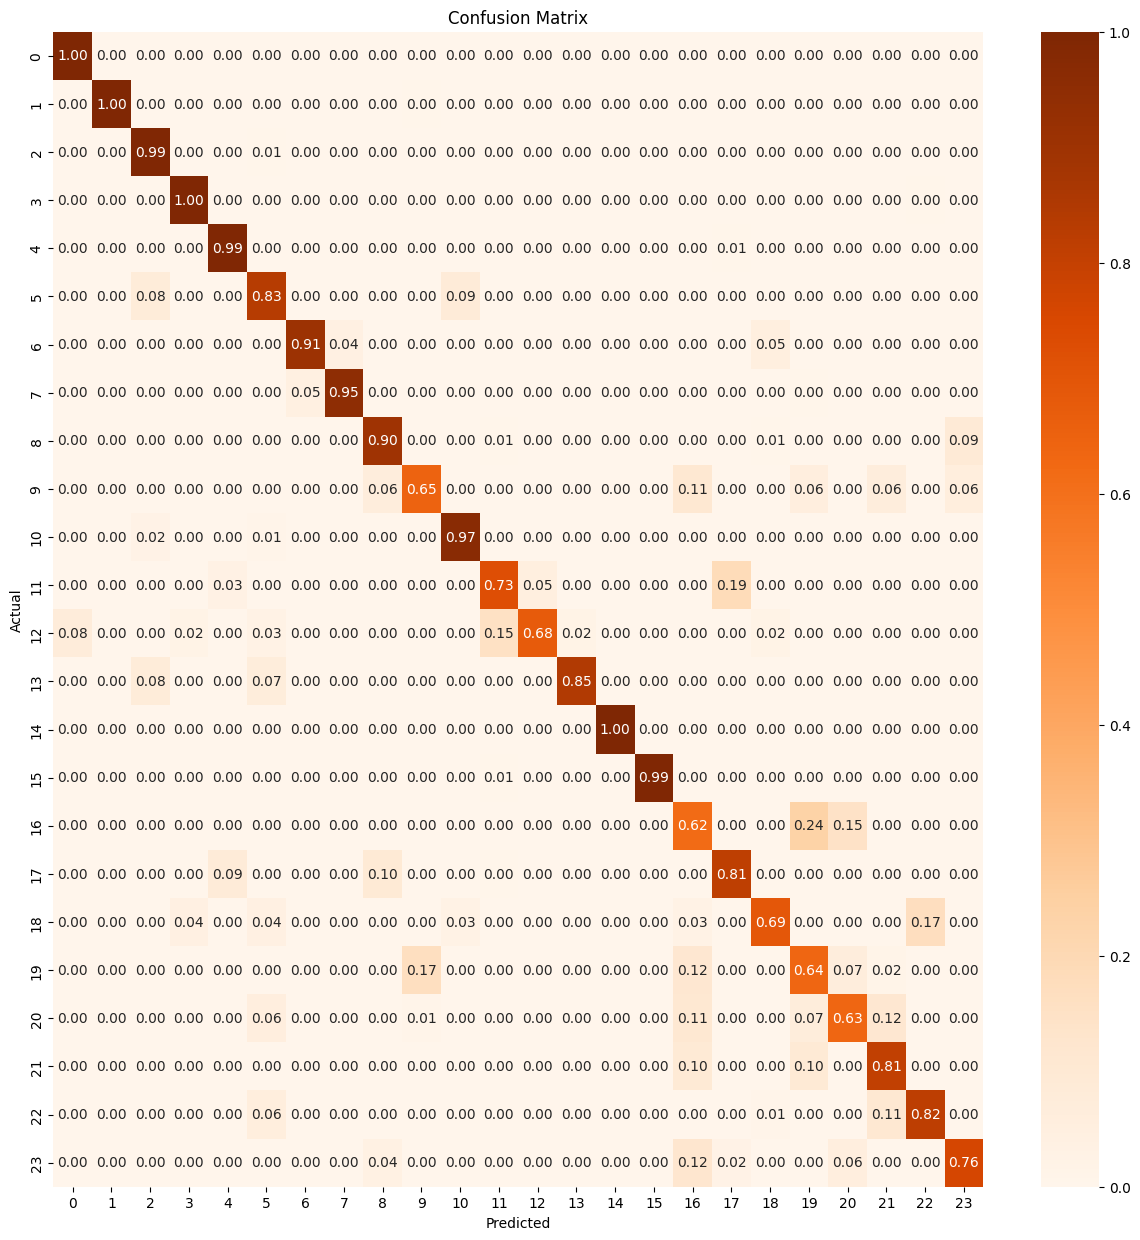

In [48]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_svc)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

#### Storing Results:

In [49]:
storeResults('Support Vector Machine',acc_train_svc, acc_test_svc)

#### Storing Model:

In [50]:
import joblib
joblib.dump(svc,'model/SVM_model')

['model/SVM_model']

Actual Label :  V
Predicted Label :  M


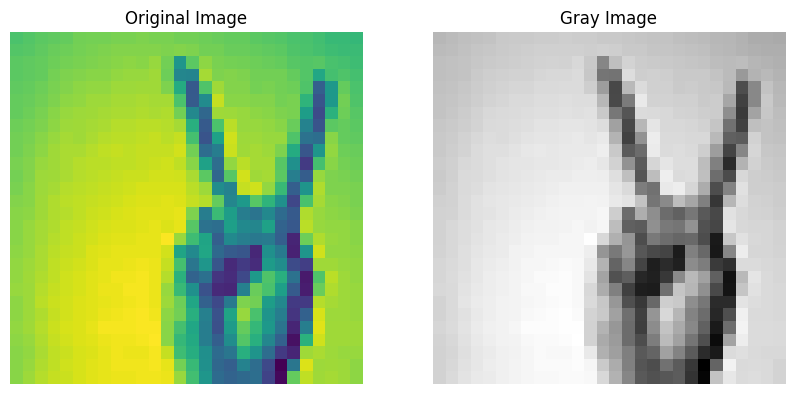

In [51]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(1214,y_test_svc)

Actual Label :  H
Predicted Label :  I


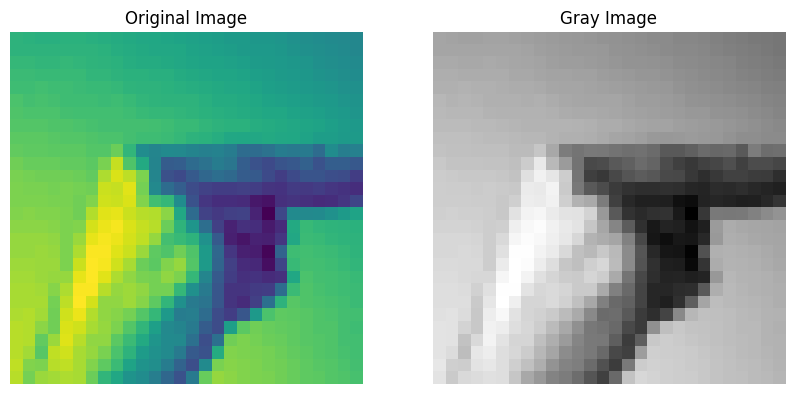

In [52]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(3233,y_test_svc)

## 6.4. Random Forest : Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

forest = Pipeline([('reduce_dims', PCA(n_components=113)),
                ('model', RandomForestClassifier(n_estimators=100))])

forest.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', RandomForestClassifier())])

In [54]:
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

#### Performance Evaluation:

In [55]:
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)

print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random Forest : Accuracy on training Data: 1.000
Random Forest : Accuracy on test Data: 0.772


In [56]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       331
           1       0.90      0.93      0.91       432
           2       0.78      1.00      0.88       310
           3       0.89      0.84      0.87       245
           4       0.89      0.92      0.91       498
           5       0.82      0.91      0.86       247
           6       0.88      0.88      0.88       348
           7       0.94      0.86      0.90       436
           8       0.83      0.76      0.80       288
          10       0.63      0.53      0.58       331
          11       0.83      1.00      0.91       209
          12       0.78      0.63      0.69       394
          13       0.70      0.47      0.57       291
          14       1.00      0.67      0.80       246
          15       0.97      1.00      0.98       347
          16       0.78      0.95      0.85       164
          17       0.21      0.45      0.29       144
          18       0.53    

<Figure size 1000x1000 with 0 Axes>

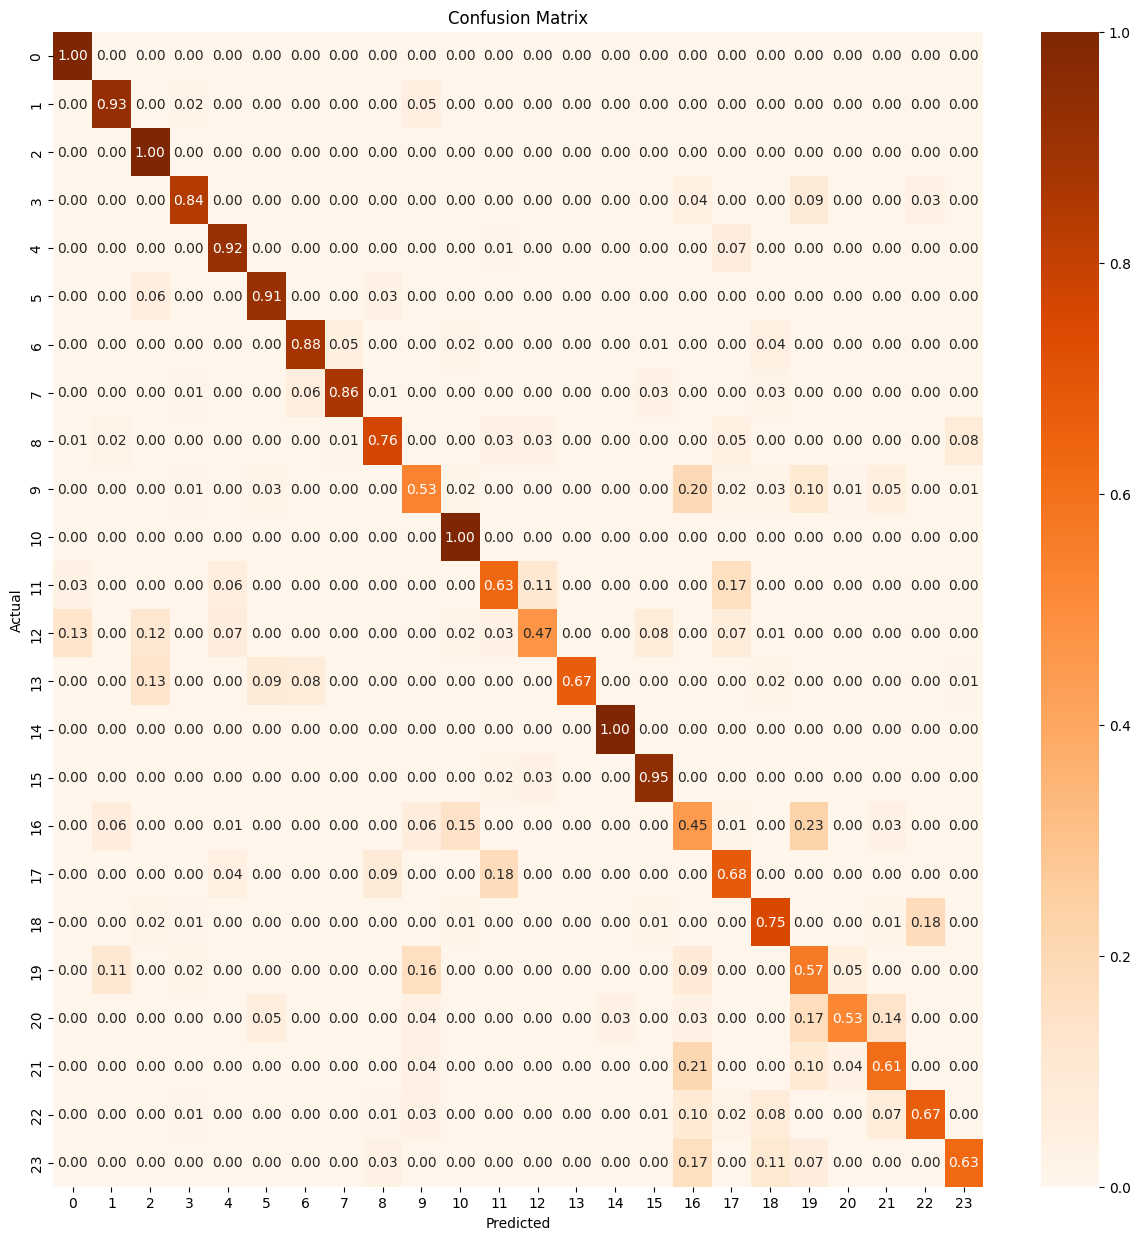

In [57]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_forest)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

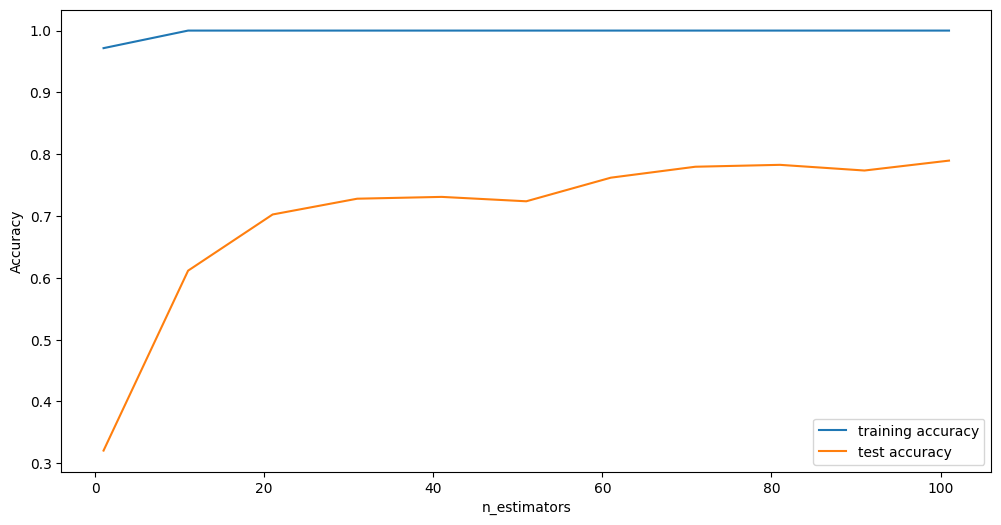

In [58]:
training_accuracy = []
test_accuracy = []
depth = range(1,102,10)
for n in depth:
    forest_test = Pipeline([('reduce_dims', PCA(n_components=113)),
                       ('model', RandomForestClassifier(n_estimators=n))])

    forest_test.fit(X_train, y_train)

    training_accuracy.append(forest_test.score(X_train, y_train))

    test_accuracy.append(forest_test.score(X_test, y_test))
    

plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

#### Storing Results:

In [59]:
storeResults('Random Forest',acc_train_forest, acc_test_forest)

#### Storing Model:

In [60]:
import joblib
joblib.dump(forest,'model/forest_model')

['model/forest_model']

Actual Label :  P
Predicted Label :  U


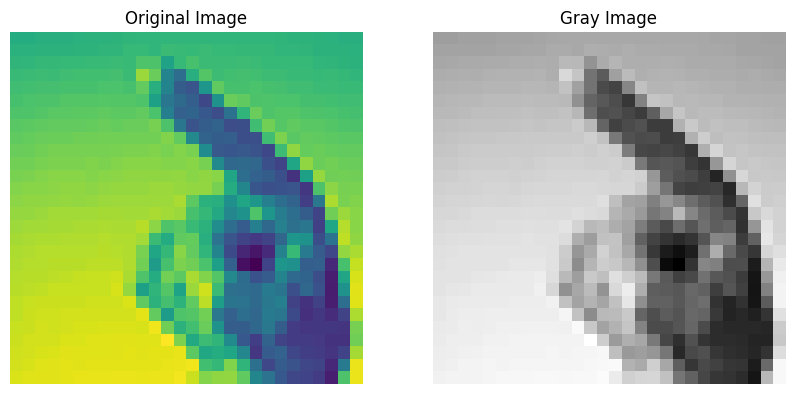

In [61]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(6532,y_test_forest)

Actual Label :  C
Predicted Label :  S


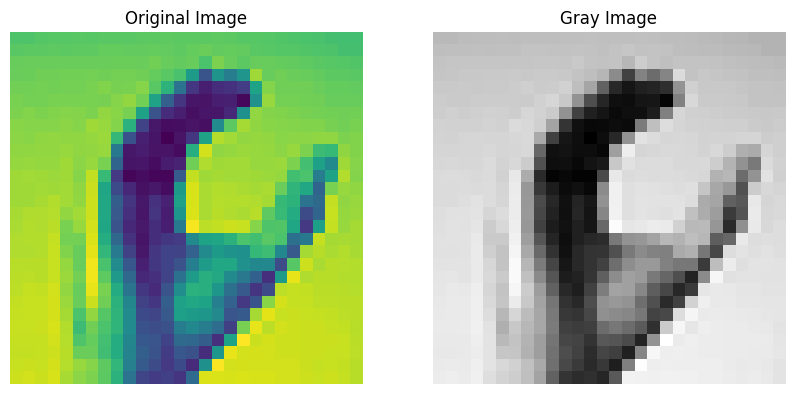

In [62]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(32,y_test_forest)

## 6.5. Naive Bayes : Classifier

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

nb= Pipeline([('reduce_dims', PCA(n_components=113)),('model', GaussianNB())])

nb.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', GaussianNB())])

In [64]:
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

#### Performance Evaluation:

In [65]:
acc_train_nb =  metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb =  metrics.accuracy_score(y_test,y_test_nb)

print("Naive Bayes : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes : Accuracy on test Data: {:.3f}".format(acc_test_nb))

Naive Bayes : Accuracy on training Data: 0.795
Naive Bayes : Accuracy on test Data: 0.622


In [66]:
print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       331
           1       0.93      0.82      0.87       432
           2       1.00      0.75      0.86       310
           3       0.66      0.73      0.69       245
           4       0.90      0.76      0.83       498
           5       0.63      0.60      0.61       247
           6       0.83      0.64      0.72       348
           7       0.99      0.80      0.88       436
           8       0.63      0.52      0.57       288
          10       0.66      0.38      0.48       331
          11       0.75      0.77      0.76       209
          12       0.83      0.49      0.62       394
          13       0.42      0.40      0.41       291
          14       0.76      0.61      0.67       246
          15       0.74      0.49      0.59       347
          16       0.33      0.85      0.47       164
          17       0.21      0.65      0.31       144
          18       0.42    

<Figure size 1000x1000 with 0 Axes>

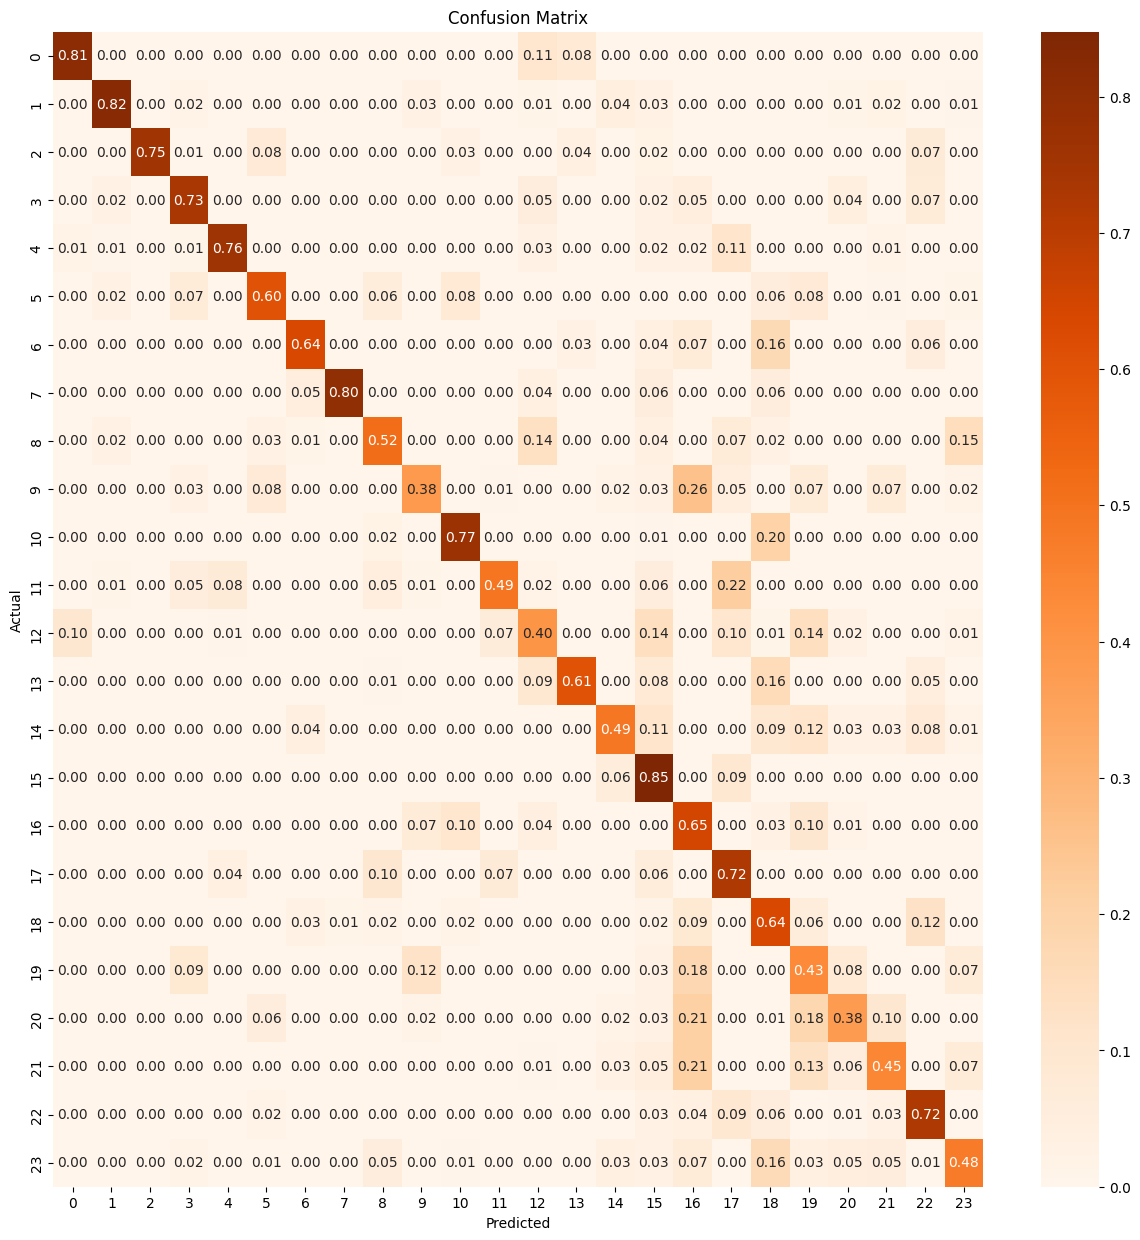

In [67]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_nb)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

#### Storing Results:

In [68]:
storeResults('Naive Bayes',acc_train_nb, acc_test_nb)

#### Storing Model:

In [69]:
import joblib
joblib.dump(nb,'model/naive_bayes_model')

['model/naive_bayes_model']

Actual Label :  P
Predicted Label :  U


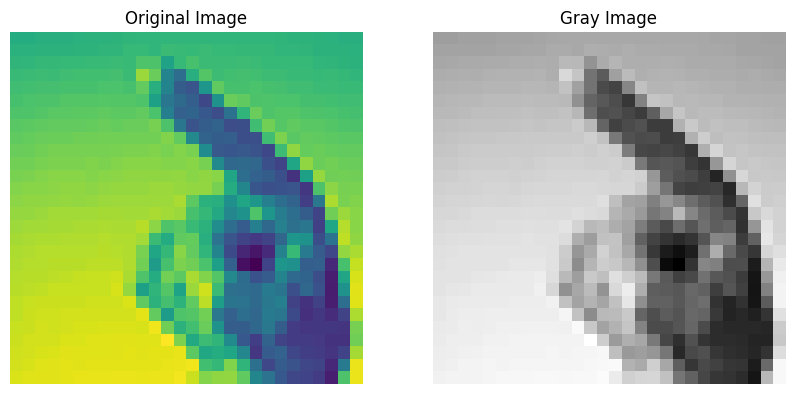

In [70]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(6532,y_test_nb)

Actual Label :  X
Predicted Label :  P


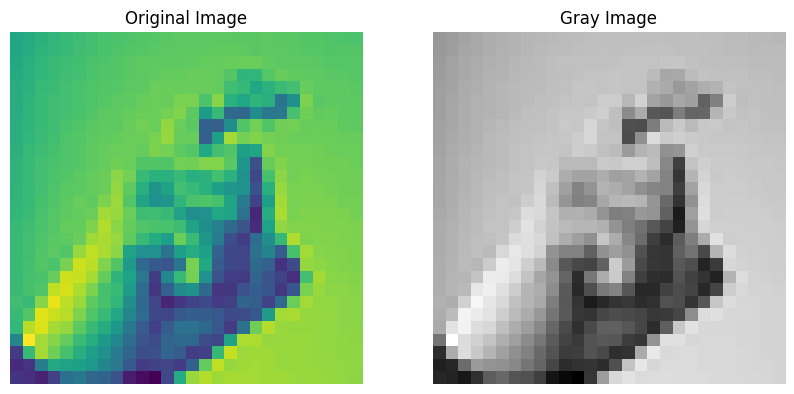

In [71]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(25,y_test_nb)

## 6.6. K-Nearest Neighbors : Classifier


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn = Pipeline([('reduce_dims', PCA(n_components=113)),('model', KNeighborsClassifier())])

knn.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', KNeighborsClassifier())])

In [73]:
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

#### Performance Evaluation:

In [74]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)

print("K neighest neighbour : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K neighest neighbour : Accuracy on test Data: {:.3f}".format(acc_test_knn))

K neighest neighbour : Accuracy on training Data: 0.999
K neighest neighbour : Accuracy on test Data: 0.816


In [75]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       0.95      0.92      0.94       432
           2       0.97      1.00      0.99       310
           3       0.75      0.94      0.84       245
           4       0.79      0.97      0.87       498
           5       0.89      0.93      0.91       247
           6       0.91      0.94      0.92       348
           7       0.96      0.95      0.95       436
           8       0.86      0.70      0.77       288
          10       0.87      0.60      0.71       331
          11       0.94      0.94      0.94       209
          12       0.81      0.52      0.63       394
          13       0.79      0.64      0.71       291
          14       1.00      0.93      0.96       246
          15       0.99      1.00      1.00       347
          16       0.95      1.00      0.97       164
          17       0.34      0.62      0.44       144
          18       0.68    

<Figure size 1000x1000 with 0 Axes>

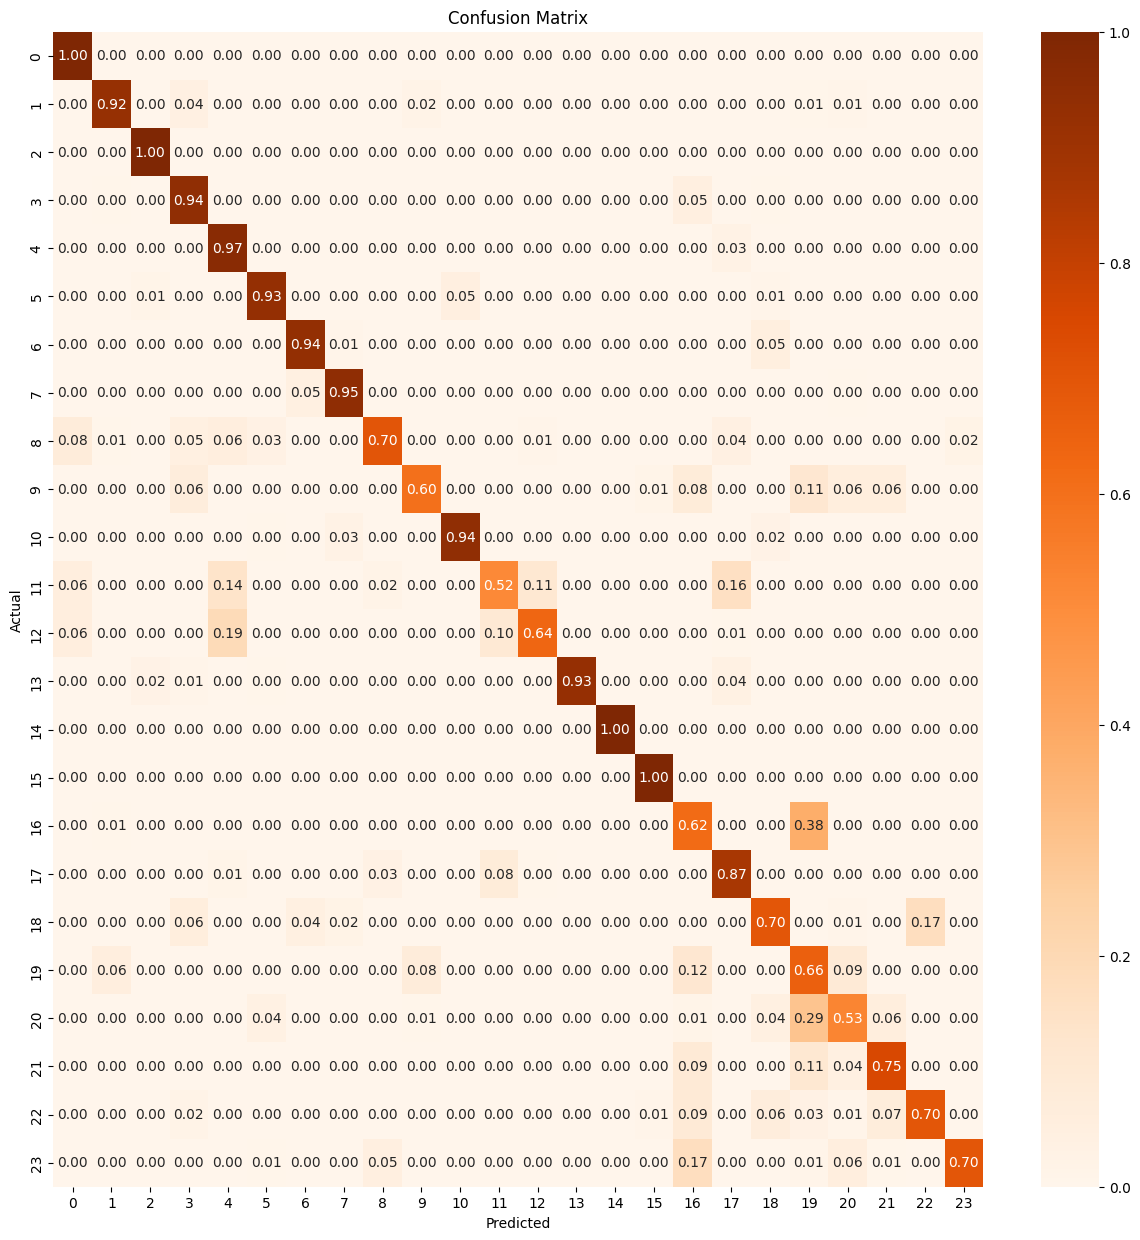

In [76]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_knn)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

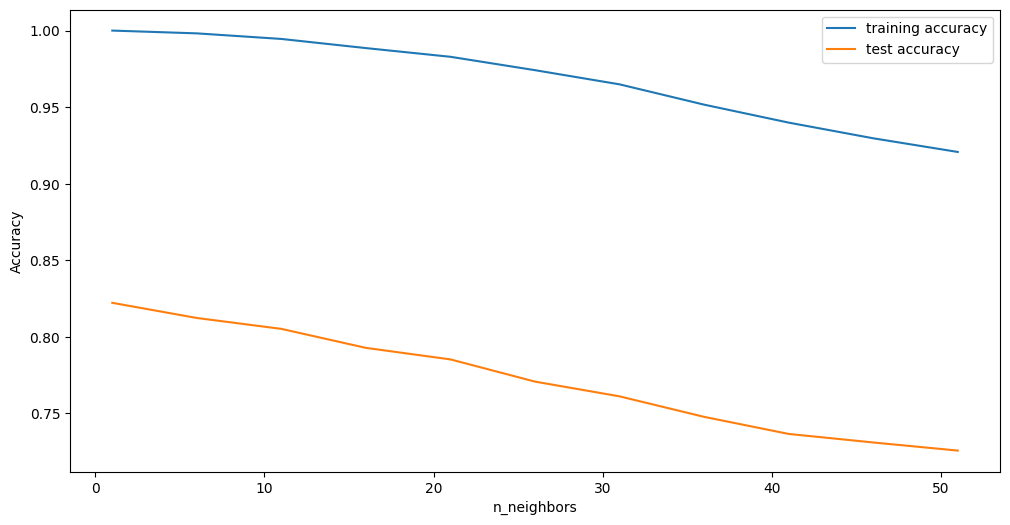

In [77]:
training_accuracy = []
test_accuracy = []

depth = range(1,52,5)
for n in depth:
    knn = Pipeline([('reduce_dims', PCA(n_components=113)),
                    ('model', KNeighborsClassifier(n_neighbors=n))])

    knn.fit(X_train, y_train)

    training_accuracy.append(knn.score(X_train, y_train))

    test_accuracy.append(knn.score(X_test, y_test))
    

plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()


#### Storing Results:

In [78]:
storeResults('K-Nearest Neighbors',acc_train_knn, acc_test_knn)

#### Storing Model:

In [79]:
import joblib
joblib.dump(knn,'model/kneighbors_model')

['model/kneighbors_model']

Actual Label :  E
Predicted Label :  P


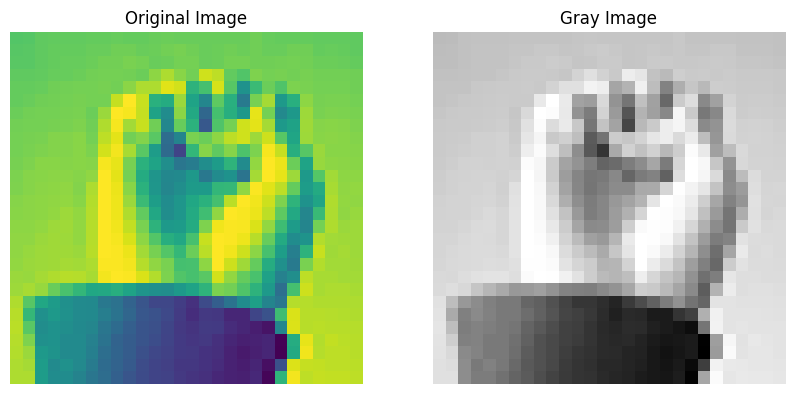

In [80]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(632,y_test_knn)

Actual Label :  Q
Predicted Label :  K


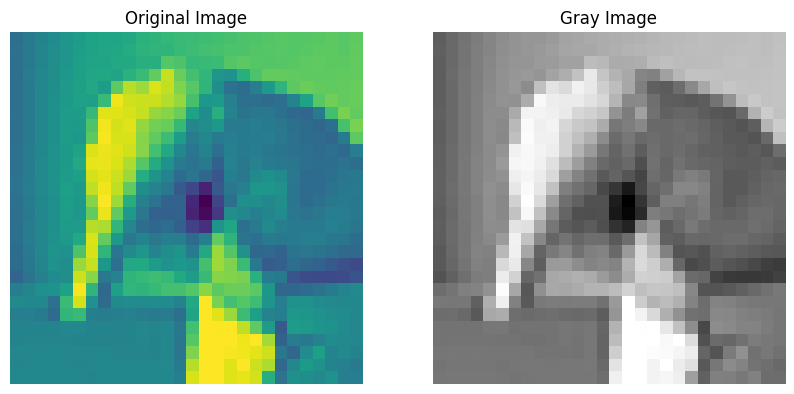

In [81]:
# Checking Image for Actual and Predicted Label
Show_Test_Image(5432,y_test_knn)

## 7. Comparision of Models:

In [82]:
result = pd.DataFrame({ 'ML Model': ML_Model,
                        'Train Accuracy': acc_train,
                        'Test Accuracy': acc_test,})

In [83]:
result

,ML Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.999,0.674
1,Decision Tree,0.994,0.412
2,Support Vector Machine,1.000,0.851
3,Random Forest,1.000,0.772
4,Naive Bayes,0.795,0.622
5,K-Nearest Neighbors,0.999,0.816


In [84]:
sorted_result=result.sort_values(by=['Test Accuracy', 'Train Accuracy'],ascending=False).reset_index(drop=True)

In [85]:
sorted_result

,ML Model,Train Accuracy,Test Accuracy
0,Support Vector Machine,1.000,0.851
1,K-Nearest Neighbors,0.999,0.816
2,Random Forest,1.000,0.772
3,Logistic Regression,0.999,0.674
4,Naive Bayes,0.795,0.622
5,Decision Tree,0.994,0.412


## 8. Conclusion:

1. Successfully implement and test various Classifier model and classify Images in American Sign Language.
2. Among all the trained models, Support Vector Machine is giving better accuracy for training as well as testing dataset. 